# Unsupervised learning: clustering & dimensionality reduction

Welcome to this exciting practical session where we will dive into the world of unsupervised learning. You will get hands-on experience by implementing the K-means clustering algorithm, initially using it to compress an image for an insightful exploration of data compression techniques. Following this, we will shift our focus to Principal Component Analysis (PCA), applying it to face images to discover how to efficiently represent data in a lower-dimensional space. This exercise aims to deepen your understanding of these powerful algorithms and their practical applications in image processing and dimensionality reduction.

The practical wll be divided into 4 parts:

- Basic 2D data clustering
- Apply KMeans for image compression
- Basic PCA application
- PCA for feature extraction


### Basic KMeans

Load the data `data_cluster.mat`. You are going to use this dataset to benchmark the kmeans algorithm.

In [1]:
import scipy.io as sio

In [ ]:
data = sio.loadmat('data_cluster.mat')
data

In [3]:
x = data['X']
x.shape

(300, 2)

In [6]:
import pandas as pd

In [8]:
df = pd.DataFrame(x)
df

,0,1
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894
...,...,...
295,7.302787,3.380160
296,6.991984,2.987067
297,4.825534,2.779617
298,6.117681,2.854757


Plot the data

In [9]:
import plotly.express as px
fig = px.scatter(df, x=0, y=1)
fig.show()

Use the function from sklearn to fit the KMeans

In [10]:
from sklearn.cluster import KMeans

In [11]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(x)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=3)

Display the cluster center

In [12]:
kmeans.cluster_centers_

array([[3.04367119, 1.01541041],
       [6.03366736, 3.00052511],
       [1.95399466, 5.02557006]])

Get the cluster label for each datapoint

In [14]:
kmeans.labels_

array([2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2], d

In [15]:
df['cluster'] = kmeans.labels_
df

,0,1,cluster
0,1.842080,4.607572,2
1,5.658583,4.799964,1
2,6.352579,3.290854,1
3,2.904017,4.612204,2
4,3.231979,4.939894,2
...,...,...,...
295,7.302787,3.380160,1
296,6.991984,2.987067,1
297,4.825534,2.779617,1
298,6.117681,2.854757,1


In [16]:
import plotly.express as px
fig = px.scatter(df, x=0, y=1, color='cluster')
fig.show()

### Image compression

This is not a perfect method for image compression. But its cool because we can reduce the color map of the image using the KMeans

Load `bird_small.png` you can use matplotlib image

Ensure each pixel value is between 0 and 1

In [77]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
image = mpimg.imread('bird_small.png')
image

In [107]:
image.shape

(128, 128, 3)

plot the image

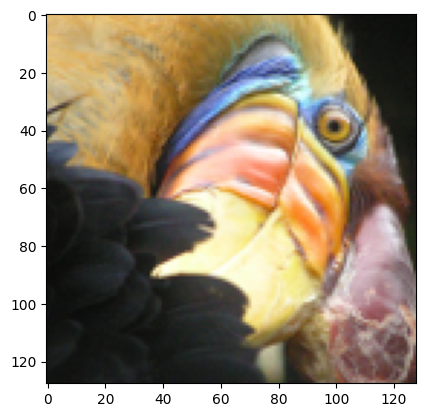

In [108]:
plt.imshow(image)

reshape the image to have only 2 dimensions: (nb_rows * nb_cols, 3)

In [160]:
data = image.reshape((-1, 3))
data

array([[0.85882354, 0.7058824 , 0.40392157],
       [0.9019608 , 0.7254902 , 0.45490196],
       [0.8862745 , 0.7294118 , 0.43137255],
       ...,
       [0.25490198, 0.16862746, 0.15294118],
       [0.22745098, 0.14509805, 0.14901961],
       [0.20392157, 0.15294118, 0.13333334]], dtype=float32)

In [161]:
data.shape

(16384, 3)

Now fit a KMeans on this dataset, each row is a pixel and you have the 3 components as features.

You can start by using 16 clusters

In [162]:
kmeans = KMeans(n_clusters=16)
kmeans.fit(data)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



KMeans(n_clusters=16)

In [163]:
kmeans.cluster_centers_

array([[0.08481646, 0.09187415, 0.08166182],
       [0.96511257, 0.86205184, 0.63579786],
       [0.58474374, 0.49629775, 0.44564426],
       [0.91781145, 0.5738727 , 0.254606  ],
       [0.9768409 , 0.94693244, 0.8196663 ],
       [0.28973117, 0.2576074 , 0.25230265],
       [0.56801814, 0.71966255, 0.868525  ],
       [0.65688264, 0.47703928, 0.21488728],
       [0.16434997, 0.16613626, 0.15821476],
       [0.76022464, 0.6118872 , 0.34892422],
       [0.4719723 , 0.34144747, 0.1801444 ],
       [0.38700074, 0.45751634, 0.6457521 ],
       [0.45094568, 0.38309574, 0.3527035 ],
       [0.69965327, 0.6287519 , 0.56320137],
       [0.827471  , 0.74661756, 0.7369887 ],
       [0.8717842 , 0.72041917, 0.45947713]], dtype=float32)

now multiply the cluster centers by 255 to put them in the range 0 to 255 and then convert the dataframe in uint8.

Then Map each pixel to the cluster center it belongs to and reshape your data to have (128, 128, 3)

In [169]:
# Ensure the cluster centers are scaled correctly and convert to uint8
cluster_centers_uint8 = (kmeans.cluster_centers_ * 255).astype('uint8')

# Map each pixel to the cluster center it belongs to
compressed_data = cluster_centers_uint8[kmeans.labels_]

In [170]:
compressed_data

array([[222, 183, 117],
       [222, 183, 117],
       [222, 183, 117],
       ...,
       [ 41,  42,  40],
       [ 41,  42,  40],
       [ 41,  42,  40]], dtype=uint8)

In [175]:
compressed_data.shape

(16384, 3)

In [176]:
compressed_data = compressed_data.reshape((128, 128, 3))

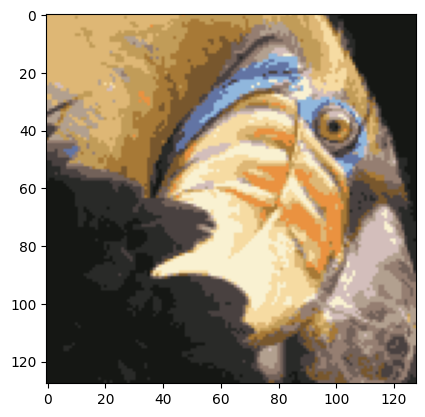

In [177]:
plt.imshow(compressed_data)

Plot the base and the compressed image

In [178]:
import matplotlib.pyplot as plt

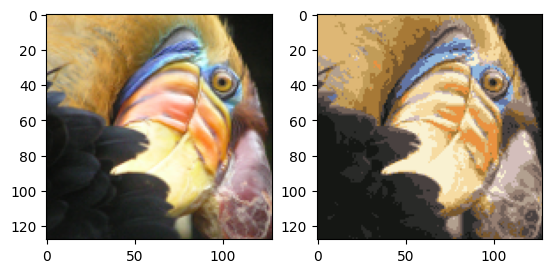

In [179]:
plt.subplot(1, 2, 1)
plt.imshow(image)

# Plot compressed image (16 colors)
plt.subplot(1, 2, 2)
plt.imshow(compressed_data)

Now make a 3D plot of all your pixel with the assigned cluster (use your dataframe with the shape: (128 * 128, 3))

In [180]:
import plotly.graph_objs as go
import plotly.express as px

# Assuming 'X' is your data array and 'kmeans.labels_' are your cluster labels
# Convert cluster centers to colors using Plotly Express default discrete color sequence
colors = px.colors.qualitative.Plotly

# Map labels to colors
label_colors = [colors[label % len(colors)] for label in kmeans.labels_]

# Create a 3D scatter plot
fig = go.Figure(data=[go.Scatter3d(
    x=data[:, 0],  # R values
    y=data[:, 1],  # G values
    z=data[:, 2],  # B values
    mode='markers',
    marker=dict(
        size=3,
        color=label_colors,  # Assign color based on cluster label
        opacity=0.8
    )
)])

# Update plot layout
fig.update_layout(
    scene=dict(
        xaxis_title='R',
        yaxis_title='G',
        zaxis_title='B'
    ),
    title="Clusters in RGB Space"
)

fig.show()

Currently our dataset has the following shape:

`data.shape=(nb_image_rows * nb_image_cols, 3)`

For each sample we have assigned a cluster from the KMeans algorithm

Now apply the PCA to reduce the dimensions to 2 and get the following shape:

`data.shape=(nb_image_rows * nb_image_cols, 2)`

To understand deeply how PCA works, you are going to implement it from scratch, you can follow those steps:

- Standardize the Data: PCA is affected by scale, so you need to scale the features in your data before applying PCA. `data = data - mean(data, axis=0)`

- Compute the Covariance Matrix: The covariance matrix expresses the correlation between the different features in the data.

- Compute Eigenvalues and Eigenvectors: The eigenvectors of the covariance matrix represent the directions of maximum variance, called principal components. The eigenvalues represent the magnitude of these directions.

- Sort Eigenvectors by Eigenvalues: The eigenvector with the highest eigenvalue is the principal component of the dataset.

- Project Data onto Principal Components: This step transforms the original data into the new space defined by the principal components. (this is just a dot product between the eigenvectors and your original data scaled)

In [183]:
import numpy as np

In [182]:
data.shape

(16384, 3)

In [184]:
# Step 1: Standardize the data
data_scaled = data - np.mean(data , axis=0)

In [187]:
# Step 2: Compute the Covariance Matrix
# Do not forget that we want a matrix of 3x3 because we have only 3 features in our dataset
cov_mat = np.cov(data_scaled , rowvar=False)
cov_mat.shape

(3, 3)

In [189]:
# Step 3: Compute Eigenvalues and Eigenvectors
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
eigen_values.shape, eigen_vectors.shape

((3,), (3, 3))

In [193]:
# Step 4: Sort the Eigenvalues and Eigenvectors
sorted_index = np.argsort(eigen_values)[::-1]
sorted_eigenvalue = eigen_values[sorted_index]
sorted_eigenvectors = eigen_vectors[:, sorted_index]

In [194]:
# Step 5: Select a Subset from the Rearranged Eigenvalue Matrix
n_components = 2
eigenvector_subset = sorted_eigenvectors[:,0:n_components]

In [196]:
eigenvector_subset.shape, data_scaled.shape

((3, 2), (16384, 3))

In [197]:
# Step 6: Transform the Data
data_reduced = np.dot(eigenvector_subset.transpose() , data_scaled.transpose() ).transpose()

In [198]:
data_reduced.shape

(16384, 2)

Now plot the 2D dataset

In [199]:
data_reduced

array([[-0.38554668, -0.14402476],
       [-0.44898512, -0.1260477 ],
       [-0.43018202, -0.13655094],
       ...,
       [ 0.44927108, -0.01748401],
       [ 0.48332582, -0.00554214],
       [ 0.50155833, -0.00509024]])

In [200]:
import plotly.express as px
fig = px.scatter(x=data_reduced[:, 0], y=data_reduced[:, 1], color=kmeans.labels_)
fig.show()

### Simple PCA with sklearn

In this part, we are going some 2D dataset and compute the principal components

Now load `data_pca.mat`

In [201]:
# Load example dataset
data = sio.loadmat('data_pca.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 22:41:44 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[3.38156267, 3.38911268],
        [4.52787538, 5.8541781 ],
        [2.65568187, 4.41199472],
        [2.76523467, 3.71541365],
        [2.84656011, 4.17550645],
        [3.89067196, 6.48838087],
        [3.47580524, 3.63284876],
        [5.91129845, 6.68076853],
        [3.92889397, 5.09844661],
        [4.56183537, 5.62329929],
        [4.57407171, 5.39765069],
        [4.37173356, 5.46116549],
        [4.19169388, 4.95469359],
        [5.24408518, 4.66148767],
        [2.8358402 , 3.76801716],
        [5.63526969, 6.31211438],
        [4.68632968, 5.6652411 ],
        [2.85051337, 4.62645627],
        [5.1101573 , 7.36319662],
        [5.18256377, 4.64650909],
        [5.70732809, 6.68103995],
        [3.57968458, 4.80278074],
        [5.63937773, 6.12043594],
        [4.26346851, 4.68942896],
        [2.53651693, 3.88449078],
      

In [202]:
data = data['X']
data.shape

(50, 2)

plot the dataset

In [203]:
fig = px.scatter(x=data[:, 0], y=data[:, 1])
fig.show()

Now compute the PCA

In [204]:
from sklearn.decomposition import PCA

In [205]:
pca = PCA()
pca

PCA()

In [206]:
pca.fit(data)

PCA()

In [215]:
mean_scaled = np.mean(data, axis=0)

components = pca.components_
explained_variance = pca.explained_variance_

Now plot the dataset with the eigenvectors

follow these steps:

- compute the mean of your data for each features to know where your vectors are going to start

- Plot your dataset (scatter plot)

- multiply your eigenvectors with the explained variance parameter from PCA

- Use `add_annotation` to plot each vector

In [238]:
import plotly.express as px
import numpy as np


mean_scaled = np.mean(data, axis=0)

components = pca.components_
explained_variance = pca.explained_variance_

components_scaled = components * explained_variance.reshape((-1, 1))

fig = px.scatter(x=data[:, 0], y=data[:, 1], labels={'x': 'Feature 1', 'y': 'Feature 2'})

for i, component in enumerate(components_scaled):
    fig.add_annotation(
        x=mean_scaled[0] + component[0],
        y=mean_scaled[1] + component[1],
        ax=mean_scaled[0],
        ay=mean_scaled[1],
        xref="x", yref="y",
        axref="x", ayref="y",
        showarrow=True,
        arrowhead=3,
        arrowsize=1,
        arrowwidth=2,
        arrowcolor=["red", "green"][i]
    )

fig.show()

### Face image dataset

In this part we are going to extract features from faces image dataset

Load `faces_dataset.mat`

In [240]:
data = sio.loadmat('faces_dataset.mat')
data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: PCWIN64, Created on: Mon Nov 14 23:46:35 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[ -37.86631387,  -45.86631387,  -53.86631387, ..., -110.86631387,
         -111.86631387,  -99.86631387],
        [   8.13368613,   -0.86631387,   -8.86631387, ...,  -34.86631387,
           -8.86631387,    0.13368613],
        [ -32.86631387,  -34.86631387,  -36.86631387, ..., -110.86631387,
         -111.86631387, -111.86631387],
        ...,
        [ -46.86631387,  -24.86631387,   -8.86631387, ...,   90.13368613,
           80.13368613,   59.13368613],
        [  19.13368613,   16.13368613,   14.13368613, ...,  -38.86631387,
          -41.86631387,  -46.86631387],
        [-108.86631387, -106.86631387, -102.86631387, ...,   17.13368613,
           17.13368613,   18.13368613]])}

plot the shape

In [241]:
data = data['X']
data.shape

(5000, 1024)

all the images have the shape 32x32

to get the first image: `data[0].reshape((32, 32), order='F')`

plot the first image

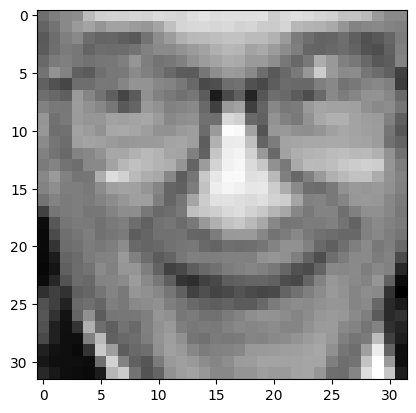

In [247]:
plt.imshow(data[0].reshape((32, 32), order='F'), cmap='gray')

In [242]:
def plot_images(X, n_rows, n_cols):
    '''
    Plot first n_rows * n_cols images from dataset X.

    X must be of shape (m, 1024).
    '''
    plt.figure(figsize=(n_cols, n_rows))
    plt.subplots_adjust(hspace=0, wspace=0)

    for i in range(n_rows * n_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(X[i].reshape((32,32), order='F'), cmap=plt.cm.gray)
        plt.xticks(())
        plt.yticks(())

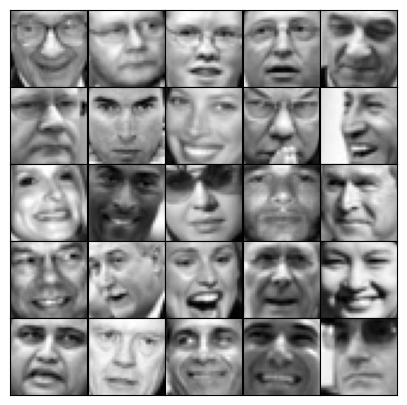

In [243]:
plot_images(data, 5, 5)

Build the standard scaler, the PCA object with 100 components and fit on your dataset

As a reminder the shape of the dataset: (nb_images, nb_img_rows x nb_img_cols)

In [250]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [251]:
# Standard scaler instance
scaler = StandardScaler()

# PCA instance for learning the first 100 principal components.
pca = PCA(n_components=100)

# PCA pipeline with data pre-processing to zero mean and unit variance
pipeline = Pipeline(steps=[('scaler', scaler), ('pca', pca)])

In [252]:
pipeline.fit(data)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA(n_components=100))])

In [254]:
pca.components_.shape

(100, 1024)

Now plot all the components

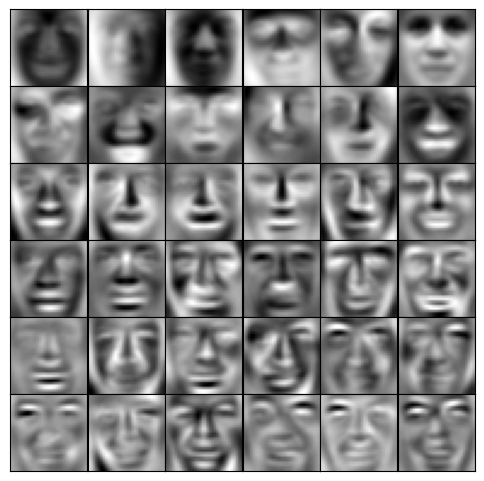

In [253]:
plot_images(pca.components_, 6, 6)

Now apply the dimensionality reduction using the PCA transform

In [255]:
data_reduced = pipeline.transform(data)
data_reduced.shape

(5000, 100)

Now reconstruct the images, (look at `inverse_transform`)

In [256]:
data_rec = pipeline.inverse_transform(data_reduced)
data_rec.shape

(5000, 1024)

Plot the reconstructed images

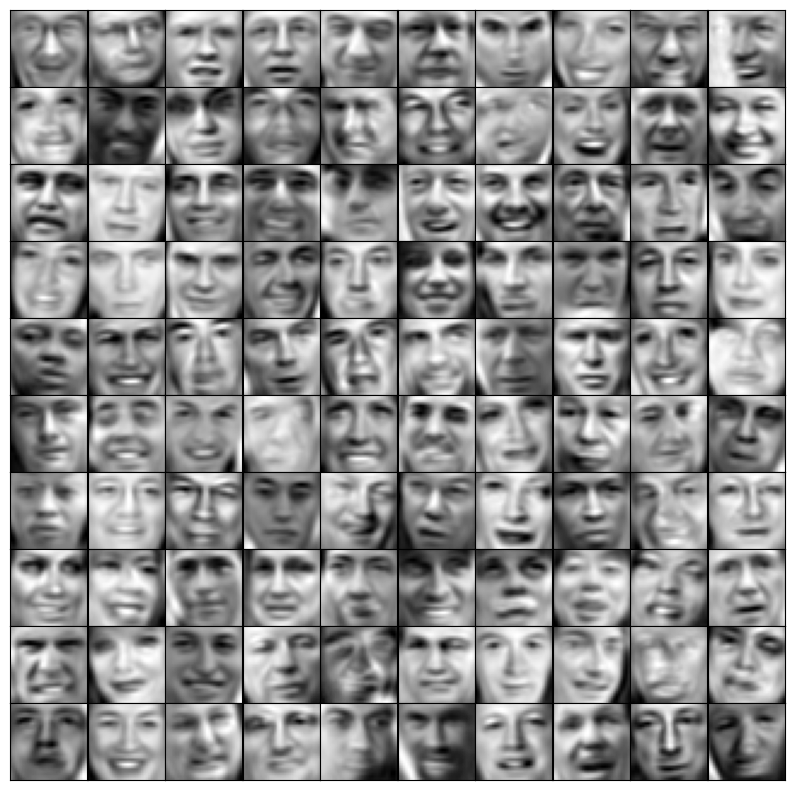

In [257]:
plot_images(data_rec, 10, 10)

This is the end, we don't have time but you need to have a look at:

- kernel PCA
- SVD
- t-SNE